In [285]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
total_centroids = 5

In [286]:
dataset = [(12,39),(20,36),(28,30),(18,52),(29,54),(33,46),(24,55),(45,59),(45,63),(52,70),(51,66),(52,63),(55,58),(53,23),(55,14),(61,8),(64,19),(69,7),(72,24)]

In [287]:
dataset = pd.read_csv("Mall_Customers.csv")
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [288]:
X = dataset.iloc[:,[3,4]].values

In [289]:
dataset = X

In [290]:
def first_iter(dataset, centroid_count):
    centroids = []
    for i in range(0, centroid_count):
        centroids.append(dataset[i])
    
    distance_vector = []

    for data in dataset:
        temp = []
        for centroid in centroids:
            temp.append(np.sqrt(np.square(centroid[0] - data[0]) + np.square(centroid[1] - data[1])))
        distance_vector.append(temp)
       
    classes = []
    for x in distance_vector:
        min = np.argmin(x)
        classes.append(min)
    c = defaultdict(list)
    for i in range(0, len(classes)):
        c[classes[i]].append(list(dataset[i]))
    centroids = []
    for part in c:
        mx = 0
        my = 0
        for tup in c[part]:
            mx += tup[0]
            my += tup[1]
        centroids.append((mx/len(c[part]),my/len(c[part])))
    return classes, centroids
         


In [291]:
'''for centroid in centroids:
        temp = []
        for data in dataset:
            temp.append(np.sqrt(np.square(centroid[0] - data[0]) + np.square(centroid[1]) - data[1]))
        distance_vector.append(temp) '''

'for centroid in centroids:\n        temp = []\n        for data in dataset:\n            temp.append(np.sqrt(np.square(centroid[0] - data[0]) + np.square(centroid[1]) - data[1]))\n        distance_vector.append(temp) '

In [292]:
first_class, centroid = first_iter(dataset, total_centroids)
centroid


[(15.0, 39.0),
 (35.888888888888886, 92.77777777777777),
 (66.11111111111111, 10.916666666666666),
 (67.85714285714286, 77.76785714285714),
 (57.08163265306123, 45.08163265306123)]

In [293]:

def next_iter(prev_class, centroids, centroid_count):
    classes = []
    c = defaultdict(list)
    while True:
        distance_vector = []

        for data in dataset:
            temp = []
            for centroid in centroids:
                temp.append(np.sqrt(np.square(centroid[0] - data[0]) + np.square(centroid[1] - data[1])))
            distance_vector.append(temp)

        classes = []
        for x in distance_vector:
            min = np.argmin(x)
            classes.append(min)
            
        if set(prev_class) == set(classes):
            break
        else:
            prev_class = classes
        c = defaultdict(list)
        for i in range(0, len(classes)):
            c[classes[i]].append(list(dataset[i]))
        centroids = []
        for part in dict(c):
            mx = 0
            my = 0
            for tup in c[part]:
                mx += tup[0]
                my += tup[1]
            centroids.append((mx/len(c[part]),my/len(c[part])))
    return classes, centroids, c


In [294]:
results, centroid, diction = next_iter(first_class, centroid, total_centroids)

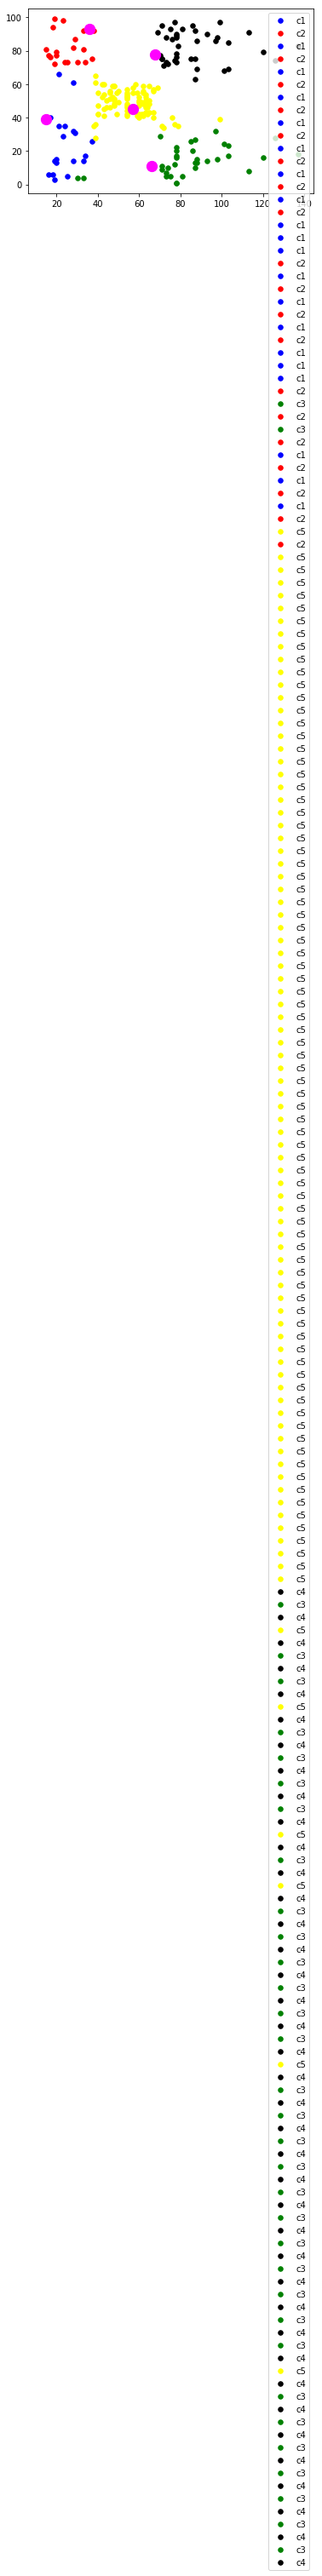

In [295]:
#Plotting the culster points
for i in range(0,len(dataset)):
    if(results[i] == 0):
        plt.scatter(dataset[i][0],dataset[i][1],c = 'blue',s = 30,label='c1')
    if(results[i] == 1):
        plt.scatter(dataset[i][0],dataset[i][1],c = 'red',s = 30,label='c2')
    if(results[i] == 2):
        plt.scatter(dataset[i][0],dataset[i][1],c = 'green',s = 30,label='c3')
    if(results[i] == 3):
        plt.scatter(dataset[i][0],dataset[i][1],c = 'black',s = 30,label='c4')
    if(results[i] == 4):
        plt.scatter(dataset[i][0],dataset[i][1],c = 'yellow',s = 30,label='c5')

#The pink points are the centroids
for centr in centroid:
    plt.scatter(centr[0], centr[1],c='magenta',s=150)

plt.legend()
plt.show()

In [296]:
centroid

[(15.0, 39.0),
 (35.888888888888886, 92.77777777777777),
 (66.11111111111111, 10.916666666666666),
 (67.85714285714286, 77.76785714285714),
 (57.08163265306123, 45.08163265306123)]